# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
Avg_fares_by_city_type = total_fares_by_city_type/total_rides_by_city_type
Avg_fares_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
Avg_fares_by_driver_city_type = total_fares_by_city_type/total_drivers_by_city_type
Avg_fares_by_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"]   =  total_rides_by_city_type
pyber_summary_df["Total Drivers"] =  total_drivers_by_city_type
pyber_summary_df["Total Fares"]   =  total_fares_by_city_type
pyber_summary_df["Average Fare per Ride"] = Avg_fares_by_city_type
pyber_summary_df["Average Fare per Driver"] = Avg_fares_by_driver_city_type

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_by_date_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]

sum_fares_by_date_df

,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df= pyber_data_df.reset_index()


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_by_date_pivot_df= pd.pivot_table(sum_fares_by_date_df, values ="fare", index=["date"], columns=["type"], aggfunc=np.sum, fill_value=np.nan) 

sum_fares_by_date_pivot_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Jan_Apr_fares_df= sum_fares_by_date_pivot_df.loc["1/1/2019":"4/29/2019"] 

Jan_Apr_fares_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Jan_Apr_fares_df.index=pd.to_datetime(Jan_Apr_fares_df.index)
Jan_Apr_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
Jan_Apr_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Jan_Apr_weekly_fares_df= Jan_Apr_fares_df.resample("w").sum()
Jan_Apr_weekly_fares_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


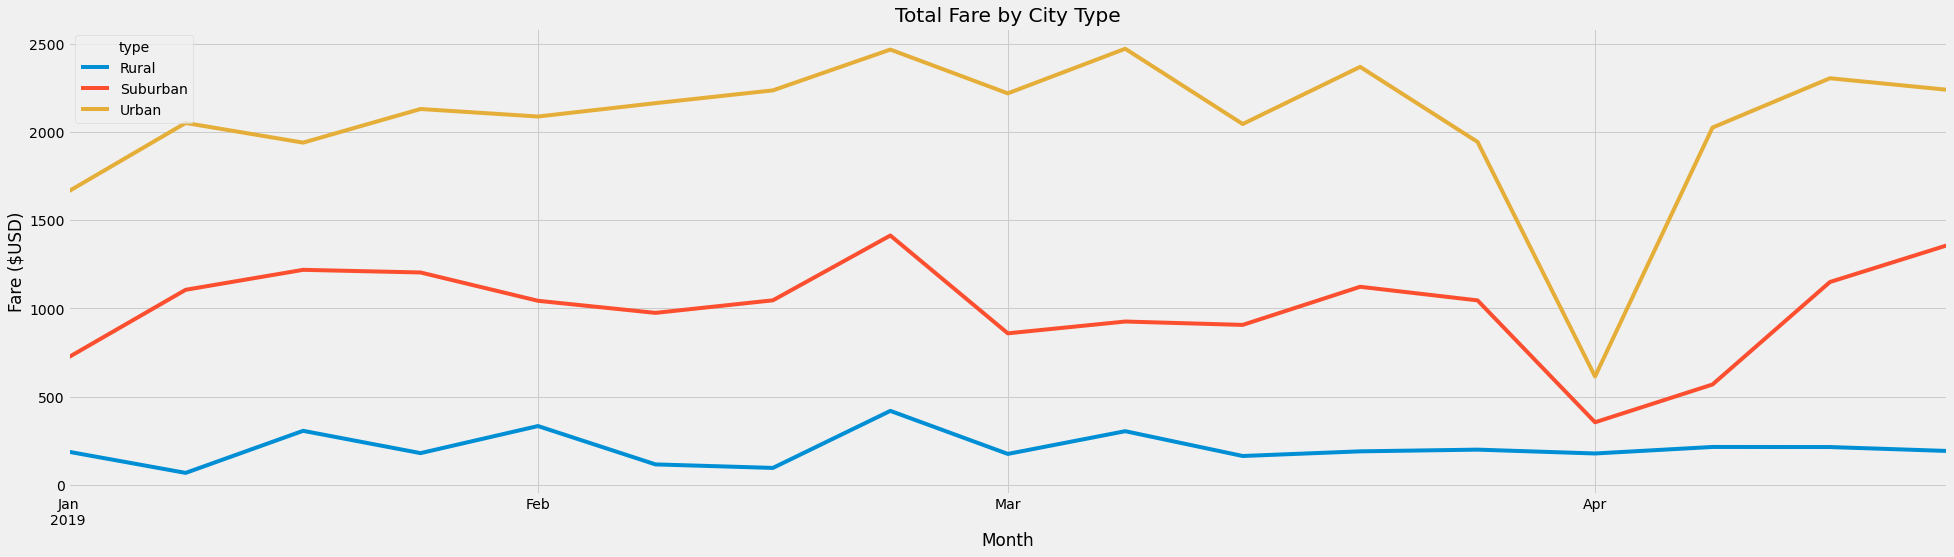

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Create a plot
ax = Jan_Apr_weekly_fares_df.plot(figsize=(30, 8))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")

# Save plot to analysis folder
plt.savefig("Images/PyBer_Fare_Summary")

plt.show()



